# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | katsuren-haebaru
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | manta
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | kailua-kona
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | callao
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | al 'alamayn
City not found. Skipping...
Processing Record 17 of Set 1 | tokonou
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 21 of Set 1 | b

Processing Record 39 of Set 4 | san patricio
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | falenki
Processing Record 42 of Set 4 | glace bay
Processing Record 43 of Set 4 | maun
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | oromocto
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | kristiansund
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | nikshahr
City not found. Skipping...
Processing Record 1 of Set 5 | chipiona
Processing Record 2 of Set 5 | dhidhdhoo
Processing Record 3 of Set 5 | tofol
Processing Record 4 of Set 5 | jacksonville
Processing Record 5 of Set 5 | nema
Processing Record 6 of Set 5 | kone
Processing Record 7 of Set 5 | vikhorevka
Processing Record 8 of Set 5 | port alfred
Processing Record 9 of Set 5 | narimanov
Processing Record 10 of Set 5 | vilyuchinsk
Processing Record 11 of Set 5 | kenai
Processing Record 12 of Set 5 | ust-ner

Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | sarandi
Processing Record 36 of Set 8 | nar'yan-mar
Processing Record 37 of Set 8 | la passe
Processing Record 38 of Set 8 | chebli
Processing Record 39 of Set 8 | trail
Processing Record 40 of Set 8 | kolonia town
Processing Record 41 of Set 8 | bay harbor
Processing Record 42 of Set 8 | zadar
Processing Record 43 of Set 8 | ladismith
City not found. Skipping...
Processing Record 44 of Set 8 | mugia
Processing Record 45 of Set 8 | nabire
Processing Record 46 of Set 8 | gallup
Processing Record 47 of Set 8 | itaueira
Processing Record 48 of Set 8 | mar del plata
Processing Record 49 of Set 8 | westport
Processing Record 0 of Set 9 | makurdi
Processing Record 1 of Set 9 | aitape
Processing Record 2 of Set 9 | acapulco de juarez
Processing Record 3 of Set 9 | polyarnyy
Processing Record 4 of Set 9 | pisco
Processing Record 5 of Set 9 | pont rouge
Processing Record 6 of Set 9 | kyabe
Processing Record 7 of Set 9 | hotan

Processing Record 23 of Set 12 | at taj
Processing Record 24 of Set 12 | bazou
Processing Record 25 of Set 12 | soio
Processing Record 26 of Set 12 | entebbe
Processing Record 27 of Set 12 | enriquillo
Processing Record 28 of Set 12 | wenling
Processing Record 29 of Set 12 | xiongzhou
Processing Record 30 of Set 12 | madalena
Processing Record 31 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 12 | harper
Processing Record 33 of Set 12 | bodo
Processing Record 34 of Set 12 | port moresby
Processing Record 35 of Set 12 | kill devil hills
Processing Record 36 of Set 12 | baijiantan
Processing Record 37 of Set 12 | kisangani
Processing Record 38 of Set 12 | portales
Processing Record 39 of Set 12 | idabel
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.90,86,100,4.92,NZ,1686684550
1,iqaluit,63.7506,-68.5145,5.85,52,75,6.17,CA,1686684550
2,karratha,-20.7377,116.8463,19.91,39,0,4.33,AU,1686684550
3,port-aux-francais,-49.3500,70.2167,5.37,96,84,9.08,TF,1686684550
4,howrah,22.5892,88.3103,31.00,84,40,4.12,IN,1686684550


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,86,100,4.92,NZ,1686684550
1,iqaluit,63.7506,-68.5145,5.85,52,75,6.17,CA,1686684550
2,karratha,-20.7377,116.8463,19.91,39,0,4.33,AU,1686684550
3,port-aux-francais,-49.3500,70.2167,5.37,96,84,9.08,TF,1686684550
4,howrah,22.5892,88.3103,31.00,84,40,4.12,IN,1686684550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

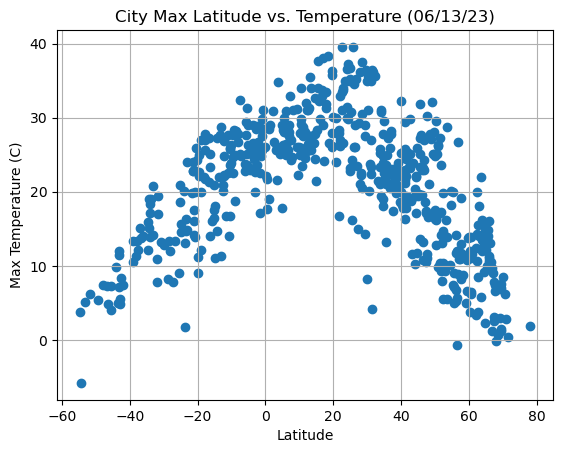

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

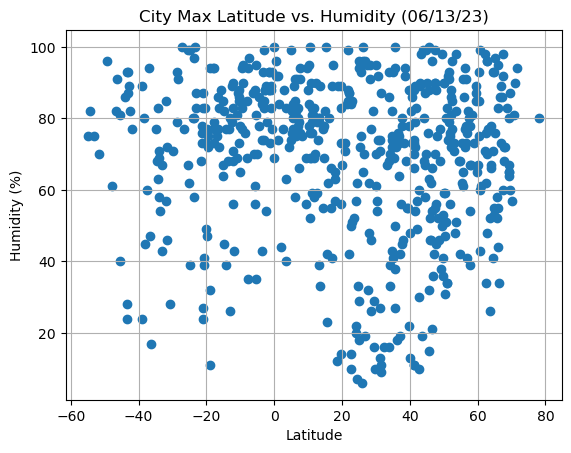

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

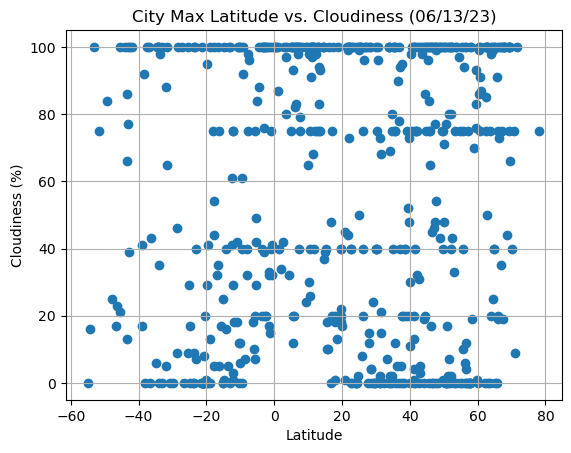

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

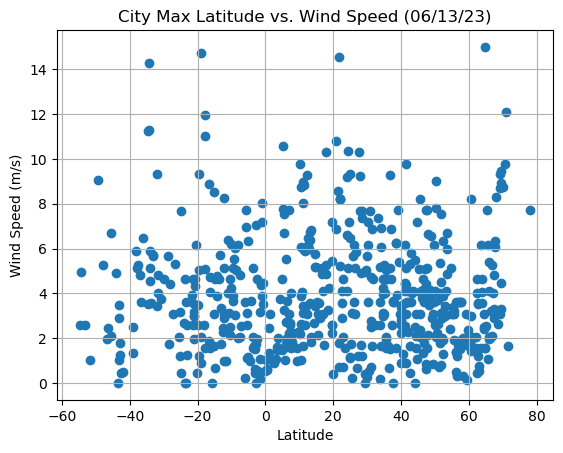

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,5.85,52,75,6.17,CA,1686684550
4,howrah,22.5892,88.3103,31.00,84,40,4.12,IN,1686684550
5,katsuren-haebaru,26.3369,127.8719,26.01,100,20,3.09,JP,1686684551
6,olonkinbyen,70.9221,-8.7187,2.85,90,9,12.09,SJ,1686684320
9,wailua homesteads,22.0669,-159.3780,26.24,87,100,8.23,US,1686684551


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,86,100,4.92,NZ,1686684550
2,karratha,-20.7377,116.8463,19.91,39,0,4.33,AU,1686684550
3,port-aux-francais,-49.3500,70.2167,5.37,96,84,9.08,TF,1686684550
7,lebu,-37.6167,-73.6500,12.19,60,100,5.28,CL,1686684551
8,manta,-0.9500,-80.7333,29.88,89,40,8.05,EC,1686684551


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.738604549898182.


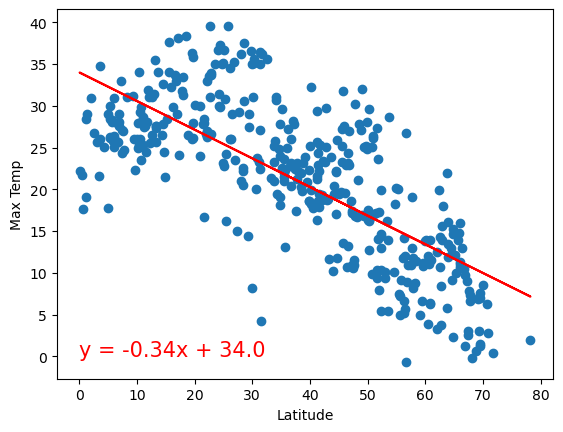

In [15]:
# Linear regression on Northern Hemisphere
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values1 = northern_hemi_df["Lat"] * slope1 + intercept1
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values1,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

print(f"The r-value is : {rvalue1}.")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()

The r-value is : 0.8206401777523401.


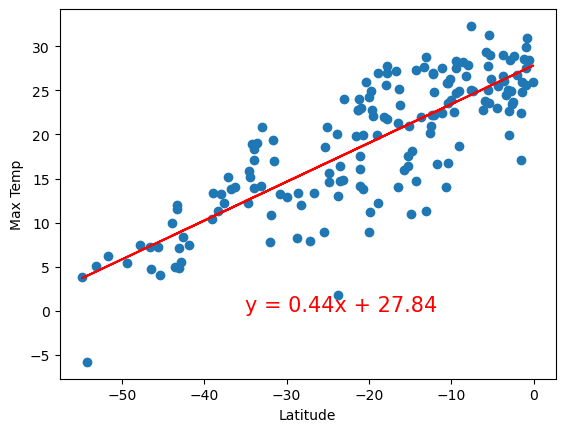

In [16]:
# Linear regression on Southern Hemisphere
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values2 = southern_hemi_df["Lat"] * slope2 + intercept2
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values2,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

print(f"The r-value is : {rvalue2}.")
plt.annotate(line_eq,(-35,0),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The linear relationship between the Latitude and Max Temp in both Northern and Southern Hemispheres is a strong one.  In the northern hemisphere the relationship is negatively correlated which means as the latitude increases, the temperature decreases. In the southern hemisphere the relationship is positively correlated which means as the latitude increases, the temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : -0.015734007471105302.


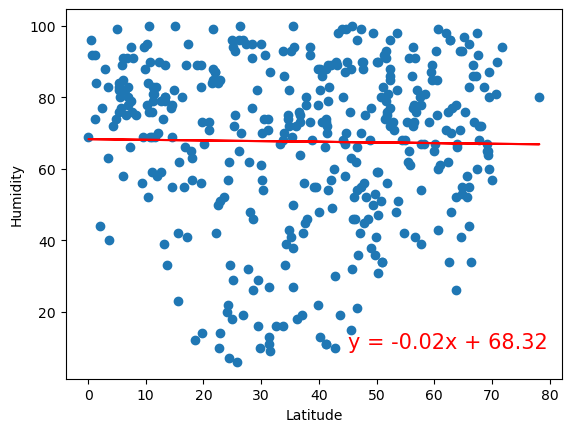

In [17]:
# Northern Hemisphere
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values3 = northern_hemi_df["Lat"] * slope3 + intercept3
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values3,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

print(f"The r-value is : {rvalue3}.")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

The r-value is : 0.1827116370114435.


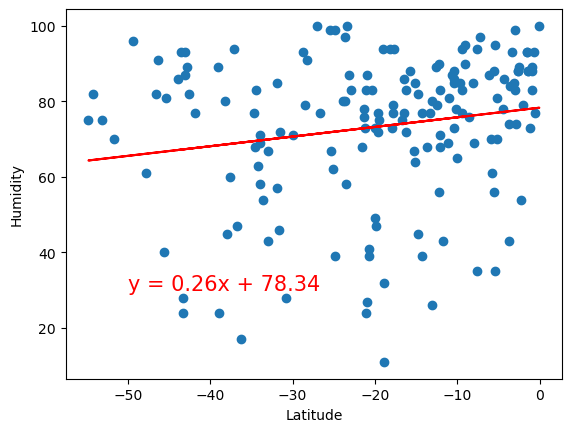

In [18]:
# Southern Hemisphere
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values4 = southern_hemi_df["Lat"] * slope4 + intercept4
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values4,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

print(f"The r-value is : {rvalue4}.")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between the Humidity and Max Temp in both Northern and Southern Hemispheres.  By looking at the r-value, we can see that it is less than 0.3 for both Northern and Southern Hemispheres which means that there is no correlation between the Humidity and Max Temp.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : -0.07493820746657208.


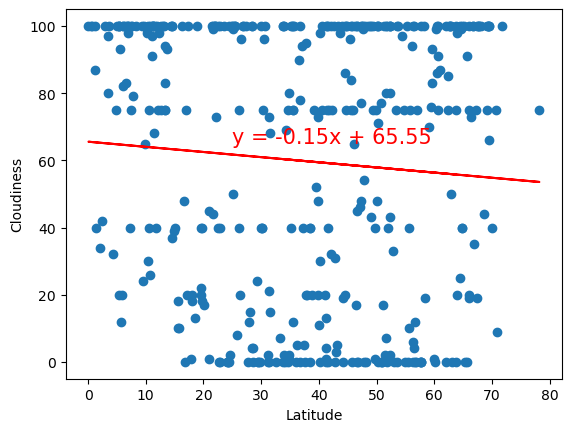

In [19]:
# Northern Hemisphere
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values5 = northern_hemi_df["Lat"] * slope5 + intercept5
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values5,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

print(f"The r-value is : {rvalue5}.")
plt.annotate(line_eq,(25,65),fontsize=15,color="red")
plt.show()

The r-value is : 0.0008270717656925252.


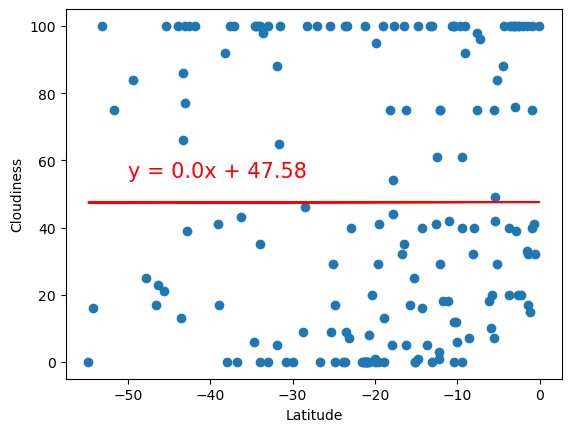

In [20]:
# Southern Hemisphere
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values6 = southern_hemi_df["Lat"] * slope6 + intercept6
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values6,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

print(f"The r-value is : {rvalue6}.")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between the Cloudiness and Max Temp in both Northern and Southern Hemispheres.  By looking at the r-value, we can see that it is less than 0.3 for both Northern and Southern Hemispheres which means that there is no correlation between the Cloudiness and Max Temp.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.02937389231445443.


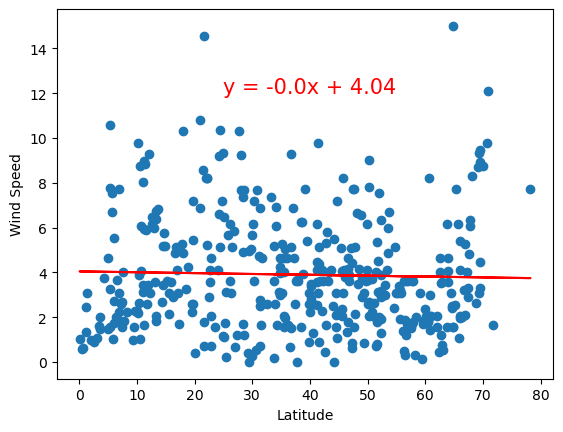

In [21]:
# Northern Hemisphere
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values7 = northern_hemi_df["Lat"] * slope7 + intercept7
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values7,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))

print(f"The r-value is : {rvalue7}.")
plt.annotate(line_eq,(25,12),fontsize=15,color="red")
plt.show()

The r-value is : -0.08388343859799899.


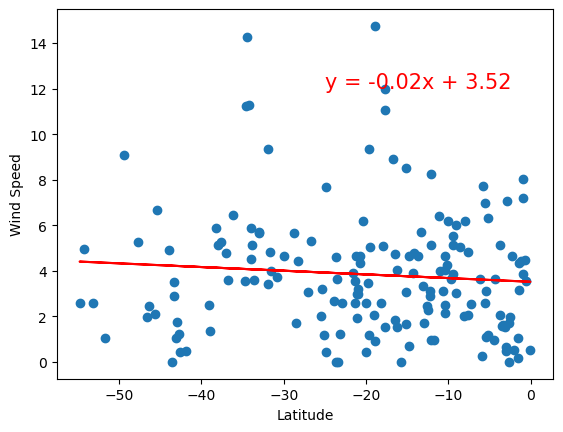

In [22]:
# Southern Hemisphere
(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values8 = southern_hemi_df["Lat"] * slope8 + intercept8
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values8,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope8,2)) + "x + " + str(round(intercept8,2))

print(f"The r-value is : {rvalue8}.")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.show()


**Discussion about the linear relationship:** There is no linear relationship between the Wind Speed and Max Temp in both Northern and Southern Hemispheres.  By looking at the r-value, we can see that it is less than 0.3 for both Northern and Southern Hemispheres which means that there is no correlation between the Wind Speed and Max Temp.